In [7]:
pip install -U gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 20.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 21.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 25.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model (this may take a minute to download)
model = api.load("glove-wiki-gigaword-100")  # GloVe vectors with 100 dimensions
print("✅ Model loaded! Ready to play with words!")

✅ Model loaded! Ready to play with words!


In [4]:
# Get user input for a word
word = input("Enter a word to find similar words: ")

# Check if the word is in the model's vocabulary
if word in model.key_to_index:
    # Find the top 5 most similar words
    similar_words = model.most_similar(word, topn=5)
    print(f"\n🔥 Words most similar to '{word}':")
    for similar_word, score in similar_words:
        print(f"{similar_word}: {score:.4f}")
else:
    print(f"⚠️ Sorry, the word '{word}' is not in the model's vocabulary.")


🔥 Words most similar to 'orange':
yellow: 0.7359
red: 0.7141
blue: 0.7118
green: 0.7111
pink: 0.6775


/Users/toniayon/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


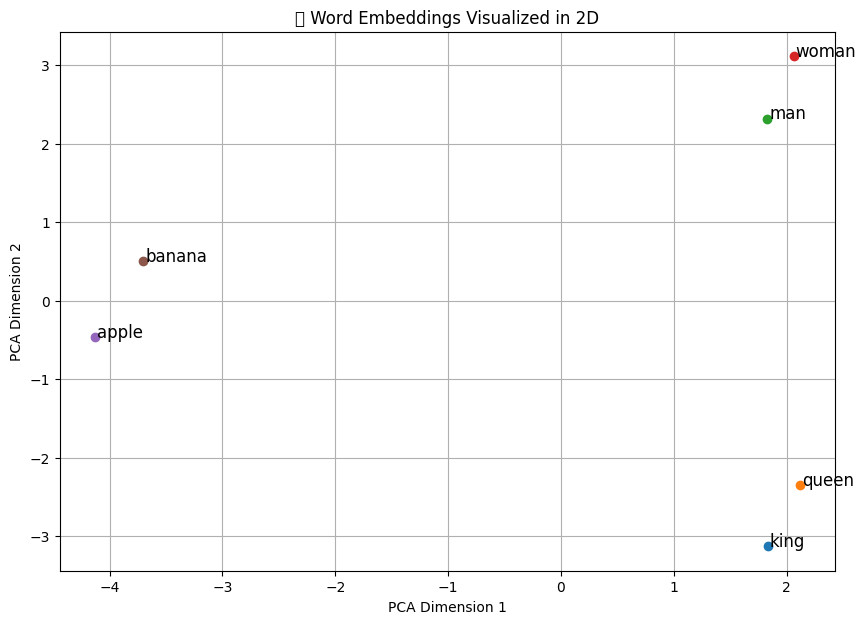

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# List of words to visualize
words = ["king", "queen", "man", "woman", "apple", "banana"]

# Get the vectors for the words
word_vectors = [model[word] for word in words]

# Reduce to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the word vectors
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], marker="o")
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1], word, fontsize=12)

plt.title("📌 Word Embeddings Visualized in 2D")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid()
plt.show()

In [6]:
import numpy as np

# Function to calculate cosine similarity using Word2Vec vectors
def cosine_similarity_word2vec(word1, word2, model):
    vector1 = model[word1]
    vector2 = model[word2]
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    return dot_product / (magnitude1 * magnitude2)

# Get user input for two words
word1 = input("Enter the first word: ")
word2 = input("Enter the second word: ")

# Calculate and print cosine similarity
if word1 in model.key_to_index and word2 in model.key_to_index:
    similarity = cosine_similarity_word2vec(word1, word2, model)
    print(f"\n🔗 Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")
else:
    print("⚠️ One or both words are not in the model's vocabulary.")


🔗 Cosine similarity between 'royalty' and 'pears': 0.0207
